# Assignment 1

## Task 1:

***Sol***:

+ 1.
$X$ uniformly distrubuted $C_1$, volume of $C_1$ is $1^p=1$, and volume of $C_d$ equals to $d^p$.   
Hence,  
$Pr(X \in C_d)= \min(\dfrac{1}{d^p}, 1.0)$  

+ 2.
Given that all components $X^p_i, i\in\{1,2,...,p\}$ are i.i.d. and conform to standard normal distribution,
we have  
$Pr(\Vert X^p_i \Vert \leq 2.576) =  Pr(\Vert X^1 \Vert \leq 2.576) = 0.99$.  
Then,  
$Pr(\Vert X^p_i \Vert_\infty \ge 2.576) = 1 - \prod_{i=1}^{p}Pr(\Vert X^p_i\Vert \leq 2.576) = 1-0.99^p$  
For $p=2, 3, 500$, values of $Pr(\Vert X^p_i\Vert_\infty \ge 2.576)$ are shown respectively as following:

In [48]:
def Pr(p):
    return (1-0.99**p)
print('Pr=%.4f, p=2\nPr=%.4f, p=3\nPr=%.4f, p=500'%( Pr(2), Pr(3), Pr(500)))

Pr=0.0199, p=2
Pr=0.0297, p=3
Pr=0.9934, p=500


## Task 2.

***sol:***

sampling and determining the minimum angles are finished in function `determ_minangles`, which calls `uniform_sample`

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt


def uniform_sample(n_samp, n_dim, lb=-1, hb= 1):
    '''generate [n_samp] uniform distributed samples in [n_dim]-dimensional hypercubes'''
    samples = np.random.rand(n_samp, n_dim) * (hb-lb) + lb
    return samples

def vec_angles(vec1, vec2):
    '''calculate anlge of two vectors'''    
    cos_val = min(np.dot(vec1, vec2)/(la.norm(vec1)*la.norm(vec2)), 1.0) # for numerical stability
    cos_val = max(cos_val, -1.0)
    return np.arccos(cos_val)

def determ_minangles(n_samp, n_dim, printmins = False, printaver = True):
    '''determining the minimum angles of each of the [n_samp] samples in [n_dim] hypercube to other vectors'''
    samples = uniform_sample(n_samp, n_dim)    # sampling
    min_angles = np.zeros(n_samp)
    
    for r in range(n_samp):
            # angles of each vector to all others
            angles_r = np.array( [vec_angles(samples[r,:], samples[c,:]) \
                  for c in range(n_samp) if c != r] )
            min_angles[r] = np.amin(angles_r)   # determine minimum angle of each vector to all others
    
    min_aver = np.average(min_angles)   # average minimum
    if printmins:
        print('minimum angles to all other samples of {0} samples:\n'.format(n_samp),
              min_angles)
    if printaver:
        print('average of minimum angles in %d dim space: %.4f rad ( %.4f deg)'%(n_dim,
                                                                                 min_aver,
                                                                                 min_aver*180/np.pi))
    
    return (samples, min_angles, min_aver)

+ 1. & 2.
Sampling 100 vectors and determing minimum of these 100 sampled vectors to all other vectors, then calculating the average of these minimum angles. Here is function `determ_minangles` defined above called .

In [8]:
Nsamples = 100
Ndim = 2
(samples, min_angles_2dim, min_aver_2dim) = determ_minangles(Nsamples, Ndim, printmins = True)

minimum angles to all other samples of 100 samples:
 [6.61118467e-02 8.20625487e-02 6.61118467e-02 1.64894629e-03
 6.26571281e-03 1.96050598e-03 1.51151100e-02 3.13812678e-02
 8.83343579e-03 8.70037684e-03 2.81062973e-02 8.81255480e-05
 1.67607730e-02 1.67607730e-02 2.28299020e-02 2.28993083e-02
 4.69190495e-02 7.82462857e-03 5.73655230e-02 6.26571281e-03
 2.28993083e-02 6.56048660e-02 1.37176585e-02 2.26995222e-03
 6.05335569e-02 6.13302249e-02 4.46287389e-02 1.99824750e-02
 6.13302249e-02 1.10692551e-02 4.08819855e-03 1.32582780e-03
 2.81062973e-02 3.11302256e-03 6.62714571e-02 5.00110490e-02
 1.57192105e-02 1.54287875e-02 2.07690071e-02 1.04794197e-02
 1.64894629e-03 6.34130950e-02 1.54287875e-02 3.86704172e-02
 8.83343579e-03 8.81255480e-05 3.81194235e-02 1.04794197e-02
 3.15622618e-02 5.57850128e-02 2.69778225e-02 6.99762160e-03
 6.56048660e-02 4.69190495e-02 3.56789996e-02 1.99824750e-02
 2.33427206e-02 7.25037520e-02 2.95277107e-02 1.47531156e-02
 5.42506729e-02 1.50810614e-02 1

+ 3.
Repeat the progress above for dimensions $d=1,2,..., 1000$


In [14]:
highest_dim = 1000
# for all dimension from 1 to 1000, evaluate the average of minimum angles
min_aver_arr =np.array([[d,determ_minangles(Nsamples, d,printaver = False)[2]] for d in range(1, highest_dim+1,1)])

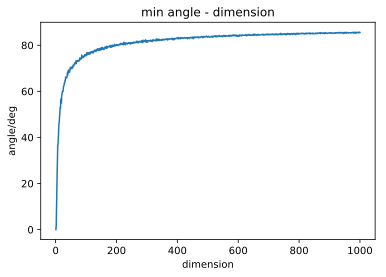

In [19]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(min_aver_arr[:,0], 180*min_aver_arr[:,1]/np.pi)
plt.title('min angle - dimension')
plt.xlabel('dimension')
plt.ylabel('angle/deg')
plt.show()

+ 4.


In [21]:
highest_dim = 200
Nsamples = 6
# for all dimension from 1 to 1000, evaluate the average of minimum angles
min_aver_arr_1 = np.array([ [d, determ_minangles(Nsamples, d, printaver=False)[2]  ]\
                           for d in range(1, highest_dim+1,1)])


In [29]:
Nsamples = 50
# for all dimension from 1 to 1000, evaluate the average of minimum angles
min_aver_arr_2 = np.array([ [d, determ_minangles(Nsamples, d,printaver=False)[2]   ]\
                           for d in range(1, highest_dim+1,1)])

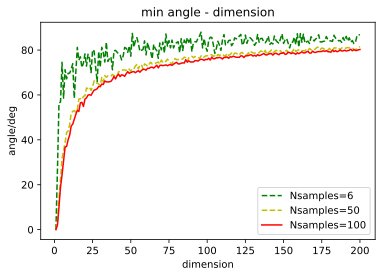

In [31]:
plt.plot(min_aver_arr_1[:,0], 180*min_aver_arr_1[:,1]/np.pi, 'g--'
         ,min_aver_arr_2[:,0], 180*min_aver_arr_2[:,1]/np.pi, 'y--'
         ,min_aver_arr[:highest_dim,0], 180*min_aver_arr[:highest_dim,1]/np.pi , 'r-'
        )
    
plt.title('min angle - dimension')
plt.legend(('Nsamples=6','Nsamples=50','Nsamples=100'))
plt.xlabel('dimension')
plt.ylabel('angle/deg')
plt.show()

## Task 3.
**Sol**
+ 1.
Yes, this table is a probability table. All elements in the table $0\leq P_{X,Y}(X=x,Y=y) \leq 1$ and summation of all elements equals to $1$.  


+ 2.
$\mathbb{E}_{Y|X=2}(Y)=\sum\limits_{y=1}^3 y\cdot P_{Y|X=2}(Y=y)=1*0.4+2*0.14+0.05*3= 0.83$  


+ 3.
 $\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} p(x,y) dx dy = \dfrac{1}{2} \neq 1$, so function $p(x,y)$ cannot be a joint density function for 2 variables.


+ 4.
marginal distributions:  
$p_{X}(x) = \int_{-\infty}^{+\infty}p(x,y)dy = \int_{x}^{+\infty}2e^{-(x+y)}dy =2e^{-x}\int_{x}^{+\infty}e^{-y}dy = -2e^{-x}e^{-y}\rvert_x^{+\infty}=2e^{-2x}$  
$p_{Y}(y) = \int_{-\infty}^{+\infty}p(x,y)dx=\int_{0}^{y}2e^{-(x+y)}dx=2e^{-y}\int_{0}^{y}e^{-x}dx=-2e^{-y}e^{-x}\rvert_0^y=2e^{-y}(1-e^{-y})$


+ 5.
$p_Y(y) = \int_0^3 \frac{1}{15}(2x+4y)dx=\frac{1}{15}（x^2+4xy)\rvert_0^3=\frac{1}{15}(9+12y)$  
$p_{X|Y}(x|y) = \dfrac{p(x,y)}{p_Y(y)} =\dfrac{1/15(2x+4y)}{1/15(9+12y)}=\dfrac{2x+4y}{9+12y} $  
$p_{X|Y}(x|\frac{1}{2}) = \dfrac{2x+2}{15}$  
$Pr(X\leq 2|Y=\frac{1}{2}) = \int_{0}^2\frac{2}{15}(x+1)dx = \dfrac{x^2+2x}{15}\rvert_0^2=\frac{8}{15}$  